This Jupyter notebook is based on the chapter "Chapter 2: Fancy Tricks with Simple Numbers" from the book ""

# Dealing with Counts

A user might
put a song or a movie on infinite playback or use a script to repeatedly check for the
availability of tickets for a popular show, which will cause the play count or website
visit count to quickly rise. It is a good idea to check the scale and
determine whether to keep the data as raw numbers, convert them into binary values
to indicate presence, or bin them into coarser granularity.

## Binarization

Binarization is the process of converting raw data into binary values to “efficiently represent raw data as a presence”. For example, this is potentially useful when making song recommendations. Instead of focusing on one the raw counts or the number of times someone listened to a song, it is potentially useful to consider “the effectiveness of scale” and how “ it's probably more efficient just to understand someone likes or does not like a song and then you can represent that as a 0 or 1”. This technique provides “more efficient representation of the raw count as well as a more robust measure of the raw count”.

## Quantization or Binning

Another solution is that we can group the counts into bins, and get rid of the actual count values. Quantization maps a continuous number to a discrete one. To determine the width of each bin, there are two categories: fixed-width binning and adaptive binning. 

### Fixed-width binning

In [2]:
import numpy as np

# generate 20 random integers uniformly from 0-99
small_counts = np.random.randint(0,100,20)

small_counts

array([58, 85, 49,  5, 98, 87, 18,  1, 13, 82, 21, 68, 70, 45, 92, 17, 58,
       64,  2, 22])

In [3]:
# map to evenly spaced bins

small_counts = small_counts//10
small_counts

array([5, 8, 4, 0, 9, 8, 1, 0, 1, 8, 2, 6, 7, 4, 9, 1, 5, 6, 0, 2])

But when the scale of counts are large, it is better to use exponential width binning i.e. taking log of count

In [4]:
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]

np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

Fixed-width binning is useful in

“evaluations of health or trying to understand like disease modeling. It might make more sense to look at things like across a lifespan the different stages of life and development in which case you may have bends that are as small as months years or decades…. understand that when you're looking at the binning you should really try to look more at the context of the variable underneath it”.

### Quantile binning

Fixed-width binning is easy to compute. But if there are large gaps in the counts, then
there will be many empty bins with no data. Solution is to use quantile binning. "pandas.qcut" maps data into a desired number
of quantiles.

In [5]:
import pandas as pd

pd.qcut(large_counts,4,False)

array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3])

# Log Transformation

The log transform is a powerful tool for dealing with positive numbers with a heavytailed distribution.

## Log Transform on the Yelp Dataset

Using log transformed Yelp review counts to predict average business
rating

In [6]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [7]:
biz_df = pd.read_csv("https://raw.githubusercontent.com/katazmic/yelpAnalytics/master/yelp_academic_dataset_business.csv")

/var/folders/jm/jkj24z8n52sdr5w8dvb59kvc0000gp/T/ipykernel_23488/871862197.py:1: DtypeWarning: Columns (1,4,7,14,18,21,27,30,43,49,52,62,64,66,70,84,89,92,100) have mixed types. Specify dtype option on import or set low_memory=False.
  biz_df = pd.read_csv("https://raw.githubusercontent.com/katazmic/yelpAnalytics/master/yelp_academic_dataset_business.csv")


In [8]:
biz_df.head(2)

,attributes.Ambience.divey,attributes.Dietary Restrictions.vegan,attributes.Happy Hour,hours.Thursday.open,attributes.Order at Counter,attributes.Hair Types Specialized In.africanamerican,attributes.Hair Types Specialized In.kids,attributes.BYOB,hours.Friday.open,categories,...,attributes.Smoking,attributes.Attire,attributes.Hair Types Specialized In.curly,attributes.Good For Groups,neighborhoods,attributes.Open 24 Hours,attributes.Ambience.romantic,attributes.Hair Types Specialized In.perms,attributes.Music.jukebox,attributes.Ambience.upscale
0,NaN,NaN,NaN,08:00,NaN,NaN,NaN,NaN,08:00,"['Doctors', 'Health & Medical']",...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,['Nightlife'],...,NaN,NaN,NaN,True,[],NaN,NaN,NaN,NaN,NaN


In [9]:
#  Compute the log transform of the review count
# we add 1 to prevent log from exploding into negative
# infinity incase the review_count is 0
biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)

Text(0, 0.5, 'Occurrence')

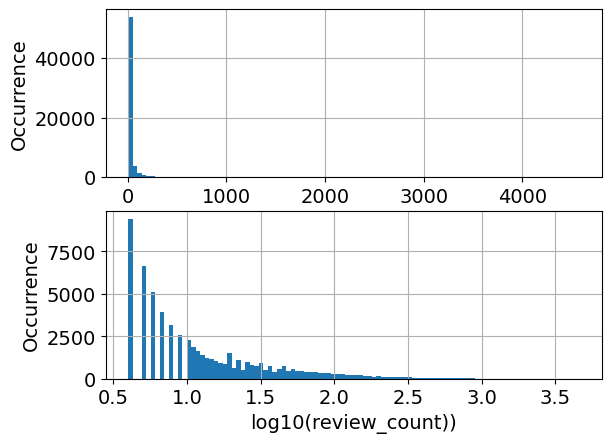

In [10]:
# Visualize the distribution of review counts before and after log transform
plt.figure()
ax = plt.subplot(2,1,1)
biz_df['review_count'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('review_count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

ax = plt.subplot(2,1,2)
biz_df['log_review_count'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('log10(review_count))', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

In [11]:
# Train linear regression models to predict the average stars rating of a business,
# using the review_count feature with and without log transformation
# Compare the 10-fold cross validation score of the two models
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, biz_df[['review_count']], biz_df['stars'], cv=10)
m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, biz_df[['log_review_count']], biz_df['stars'], cv=10)
print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: -0.03683 (+/- 0.07280)
R-squared score with log transform: -0.03694 (+/- 0.07650)


Log transforming didn't make a difference in this dataset.

## Log Transform on Online News Popularity Dataset

Using log transformed word counts in the Online News Popularity
dataset to predict article popularity

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/ymdong/MLND-Online-News-Popularity-Prediction/master/OnlineNewsPopularity.csv",delimiter=', ')

/var/folders/jm/jkj24z8n52sdr5w8dvb59kvc0000gp/T/ipykernel_23488/564826309.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("https://raw.githubusercontent.com/ymdong/MLND-Online-News-Popularity-Prediction/master/OnlineNewsPopularity.csv",delimiter=', ')


In [13]:
df.head(2)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.35000,-0.600,-0.2,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.11875,-0.125,-0.1,0.0,0.0000,0.5,0.0000,711


In [14]:
df['log_n_tokens_content'] = np.log10(df['n_tokens_content'] + 1)

Text(0, 0.5, 'Number of Articles')

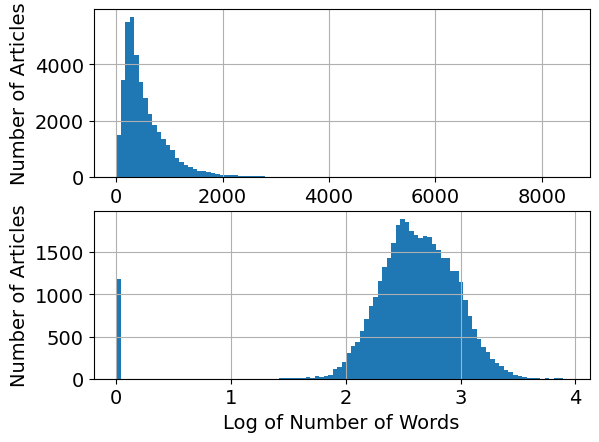

In [15]:
plt.figure()
ax = plt.subplot(2,1,1)
df['n_tokens_content'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('Number of Words in Article', fontsize=14)
ax.set_ylabel('Number of Articles', fontsize=14)

ax = plt.subplot(2,1,2)
df['log_n_tokens_content'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('Log of Number of Words', fontsize=14)
ax.set_ylabel('Number of Articles', fontsize=14)

In [16]:
news_orig_model = linear_model.LinearRegression()
scores_orig = cross_val_score(news_orig_model, df[['n_tokens_content']], df['shares'], cv=10)

news_log_model = linear_model.LinearRegression()
scores_log = cross_val_score(news_log_model, df[['log_n_tokens_content']], df['shares'], cv=10)

print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))

print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: -0.00242 (+/- 0.00509)
R-squared score with log transform: -0.00114 (+/- 0.00418)


Why is the log transform so much more successful
on this dataset? We can get a clue by looking at the scatter plots of the input feature and target values.

### Scatter plot of Review Count and Stars in Yelp Dataset

We can see that - High review counts (roughly >2,500 reviews) do correlate with higher average star ratings, but the
relationship is far from linear. There is no clear way to draw a line to predict the average
star rating based on either input. Essentially, the plot shows that review count
and its logarithm are both bad linear predictors of average star rating.

Text(0, 0.5, 'Average Star Rating')

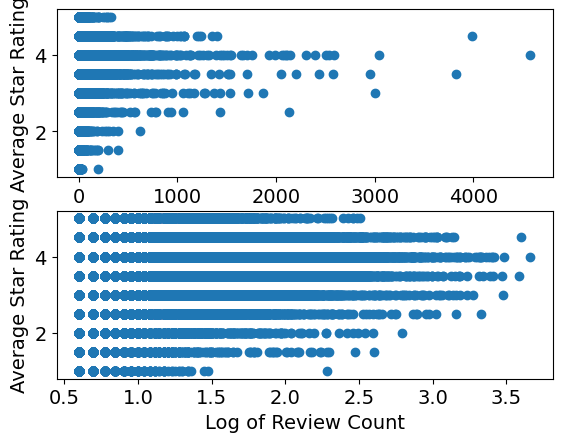

In [17]:
plt.figure()
ax1 = plt.subplot(2,1,1)
ax1.scatter(biz_df['review_count'], biz_df['stars'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Review Count', fontsize=14)
ax1.set_ylabel('Average Star Rating', fontsize=14)

ax2 = plt.subplot(2,1,2)
ax2.scatter(biz_df['log_review_count'], biz_df['stars'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Review Count', fontsize=14)
ax2.set_ylabel('Average Star Rating', fontsize=14)

### Scatter plot of Number of words and shares in Online News Popularity dataset

We can see that the log transform reshaped the x-axis, pulling the articles with
large outliers in the target value (>200,000 shares) further out toward the righthand
side of the axis. This gives the linear model more “breathing room” on the low end of
the input feature space. Without the log transform (top panel), the model is under
more pressure to fit very different target values under very small changes in the input.

Text(0, 0.5, 'Number of Shares')

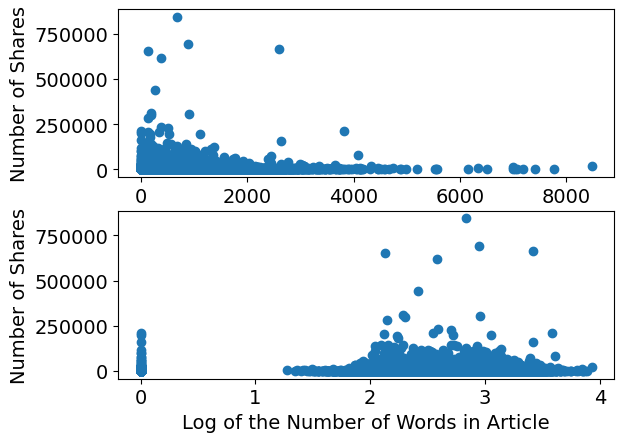

In [18]:
plt.figure()
ax1 = plt.subplot(2,1,1)
ax1.scatter(df['n_tokens_content'], df['shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Shares', fontsize=14)

ax2 = plt.subplot(2,1,2)
ax2.scatter(df['log_n_tokens_content'], df['shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of the Number of Words in Article', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)

# Power Transforms: Generalization of the Log Transform

In [19]:
from scipy import stats

# The Box-Cox transform assumes that input data is positive.
# Check the min to make sure.

biz_df['review_count'].min()

3

In [20]:
# Setting input parameter lmbda to 0 gives us the log transform (without
# constant offset)

biz_df['rc_log'] = stats.boxcox(biz_df['review_count'],lmbda=0)


# By default, the scipy implementation of Box-Cox transform finds the lambda
# parameter that will make the output the closest to a normal distribution
biz_df['rc_bc'],bc_params = stats.boxcox(biz_df['review_count'])

### Visualizing the original, log transformed and box-cox transformed counts

Text(0, 0.5, 'Occurrence')

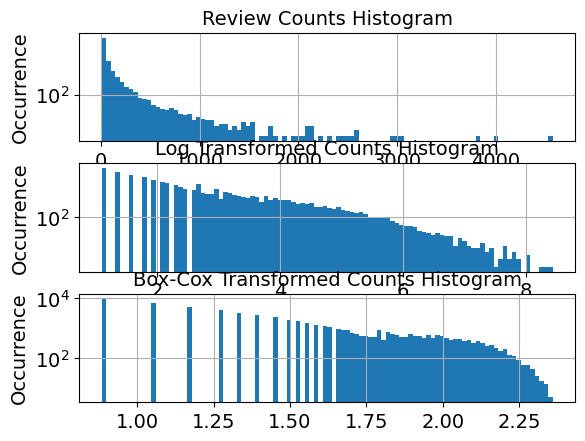

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
# original review count histogram
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# review count after log transform
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# review count after optimal Box-Cox transform
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

### Probability plots of the original and transformed counts against the normal distribution

Text(0.5, 1.0, 'Probplot after Box-Cox transform')

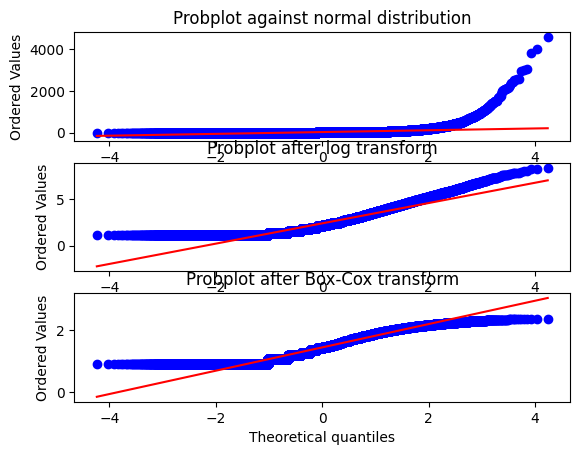

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
prob1 = stats.probplot(biz_df['review_count'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
prob2 = stats.probplot(biz_df['rc_log'], dist=stats.norm, plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after log transform')
prob3 = stats.probplot(biz_df['rc_bc'], dist=stats.norm, plot=ax3)
ax3.set_xlabel('Theoretical quantiles')
ax3.set_title('Probplot after Box-Cox transform')

# Feature Scaling Example

No matter the scaling method, feature scaling always divides the feature by a constant
(known as the normalization constant). Therefore, it does not change the shape of the
single-feature distribution. 

In [24]:
import pandas as pd
import sklearn.preprocessing as preproc

In [25]:
df = pd.read_csv("https://raw.githubusercontent.com/ymdong/MLND-Online-News-Popularity-Prediction/master/OnlineNewsPopularity.csv",delimiter=', ')

/var/folders/jm/jkj24z8n52sdr5w8dvb59kvc0000gp/T/ipykernel_23488/564826309.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("https://raw.githubusercontent.com/ymdong/MLND-Online-News-Popularity-Prediction/master/OnlineNewsPopularity.csv",delimiter=', ')


In [27]:
df['n_tokens_content'].describe() #looking at the "number of words in the article" column

count    39644.000000
mean       546.514731
std        471.107508
min          0.000000
25%        246.000000
50%        409.000000
75%        716.000000
max       8474.000000
Name: n_tokens_content, dtype: float64

In [42]:
# df['minmax'] = preproc.MinMaxScaler().fit_transform(df['n_tokens_content'].values.reshape(-1,1)) #this also works
df['minmax'] = preproc.MinMaxScaler().fit_transform(df[['n_tokens_content']]) #this is neater code

df['minmax'].describe()

count    39644.000000
mean         0.064493
std          0.055594
min          0.000000
25%          0.029030
50%          0.048265
75%          0.084494
max          1.000000
Name: minmax, dtype: float64

In [44]:
## Standardization - note that by definition, some outputs will be negative
df['standardized'] = preproc.StandardScaler().fit_transform(df[['n_tokens_content']]) 

df['standardized'].describe()

count    3.964400e+04
mean     6.703233e-17
std      1.000013e+00
min     -1.160078e+00
25%     -6.378980e-01
50%     -2.919004e-01
75%      3.597638e-01
max      1.682755e+01
Name: standardized, dtype: float64

In [48]:
df['standardized'].var() # variance is 1 and mean is 0 as seen above

1.0000252251343238

In [58]:
df['l2_normalized'] = preproc.normalize(df[['n_tokens_content']],axis=0)

df['l2_normalized'].describe()

count    39644.000000
mean         0.003804
std          0.003279
min          0.000000
25%          0.001712
50%          0.002847
75%          0.004984
max          0.058985
Name: l2_normalized, dtype: float64

In [63]:
import numpy.linalg as l

print(l.norm(df['l2_normalized'], axis=0)) #norm of 1

1.0


### Plotting the histograms of original and scaled data

Only the scale of
the x-axis changes; the shape of the distribution stays the same with feature scaling. Unlike the log transform, feature scaling
doesn’t change the shape of the distribution; only the scale of the data changes.

Text(42.722222222222214, 0.5, 'Number of articles')

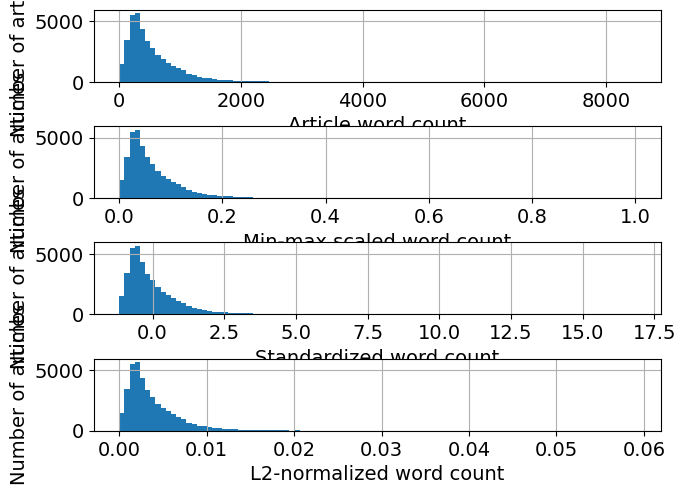

In [64]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)
fig.tight_layout()
df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)
df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
ax2.set_ylabel('Number of articles', fontsize=14)
df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
ax3.set_ylabel('Number of articles', fontsize=14)
df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
ax4.set_ylabel('Number of articles', fontsize=14)

# Interaction Features

We use pairwise interaction features from the UCI Online News
Popularity dataset to predict the number of shares for each news article. As the
results show, interaction features result in some lift in accuracy above singleton features.

In [65]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [66]:
# Select the content-based features as singleton features in the model,
# skipping over the derived features
features = ['n_tokens_title', 'n_tokens_content',
 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
 'data_channel_is_entertainment', 'data_channel_is_bus',
 'data_channel_is_socmed', 'data_channel_is_tech',
 'data_channel_is_world']

In [67]:
X = df[features]
y = df[['shares']]


# Create pairwise interaction features, skipping the constant bias term
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, random_state=123)

def evaluate_feature(X_train, X_test, y_train, y_test):
    """Fit a linear regression model on the training set and score on the test set"""
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)


(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)

print("R-squared score with singleton features: %0.5f" % r1)
print("R-squared score with pairwise interaction features: %0.5f" % r2)

R-squared score with singleton features: 0.00924
R-squared score with pairwise interaction features: 0.01133
